In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
original_tab = ""

frag_model = "prosit_l1"
for which in ["sprot_human", "IGC", "sprot_all", "sprot_bacteria_human"]:
    print("-------------------------------")
    print(which)
    our_prosit_tab = f"/data2/yejb/prosit/figs/figure6/{which}/percolator/try/prosit_l1/no_finetuned_3fold/prosit_combined_target.psms"
    original_tab = f"/data2/yejb/prosit/figs/figure6/{which}/percolator/try/prosit_l1/prosit_combined_target.psms"
    
    try:
        ori = pd.read_csv(our_prosit_tab, sep='\t')
        our = pd.read_csv(original_tab, sep='\t')
        print("")
        print((ori['q-value'] < 0.01).sum(), (our['q-value'] < 0.01).sum())
    except:
        continue
    

-------------------------------
sprot_human
-------------------------------
IGC
104416 108934
-------------------------------
sprot_all
36031 38106
-------------------------------
sprot_bacteria_human
34369 36047


In [12]:
hla_mel = pd.read_csv("../figs/data/HLA_Mel.csv")
hla_mel = hla_mel[hla_mel['Experiment'].apply(
    lambda x: x.endswith("HLA-I"))]
Mels = hla_mel['Experiment'].unique()

x = []
y_ori = []
y_our = []
for which in Mels:
# for which in ['Mel-15_HLA-I']:
    print("-------------------------------")
    print("boosting figure3", which)
    our_tab = f"/data/yejb/prosit/figs/boosting/figs/Figure_5_HLA_1/prosit_hcd/3fold_Mels_0.1/{which}_ori/prosit_target.psms"
    ori_tab = f"/data/yejb/prosit/figs/boosting/figs/Figure_5_HLA_1/forPride/rescoring_for_paper_2/Mels/{which}/percolator/prosit_target.psms"
    ori = pd.read_csv(ori_tab, sep='\t')
    our = pd.read_csv(our_tab, sep='\t')
    print("")
    print((ori['q-value'] < 0.01).sum(), (our['q-value'] < 0.01).sum())
    y_ori.append((ori['q-value'] < 0.01).sum())
    y_our.append((our['q-value'] < 0.01).sum())
    

-------------------------------
boosting figure3 Mel-3_HLA-I

34820 33863
-------------------------------
boosting figure3 Mel-4_HLA-I

40211 39401
-------------------------------
boosting figure3 Mel-12_HLA-I

46545 44923
-------------------------------
boosting figure3 Mel-5_HLA-I

47130 46544
-------------------------------
boosting figure3 Mel-8_HLA-I

54118 52754
-------------------------------
boosting figure3 Mel-15_HLA-I

418078 416349
-------------------------------
boosting figure3 Mel-16_HLA-I

252674 248050
-------------------------------
boosting figure3 Mel-21_HLA-I

67617 67055
-------------------------------
boosting figure3 Mel-27_HLA-I

62457 61436
-------------------------------
boosting figure3 Mel-28_HLA-I

38356 37775
-------------------------------
boosting figure3 Mel-41_HLA-I

54319 53670
-------------------------------
boosting figure3 Mel-24_HLA-I

33386 33181
-------------------------------
boosting figure3 Mel-30_HLA-I

24252 24103
-------------------------

Text(0, 0.5, 're-trained prosit2020')

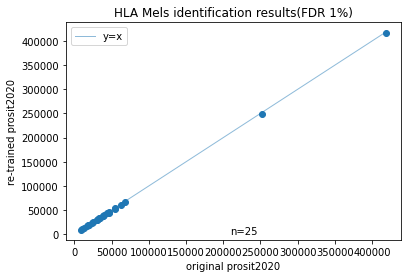

In [32]:
x = np.linspace(min(*y_ori), max(*y_ori), num=100)
k, b = np.polyfit(y_ori, y_our, deg=1)

plt.scatter(y_ori, y_our)
plt.plot(x, k*x+b, linewidth=1, alpha=0.5, label=f"y={k:.4f}x")
plt.text(max(*y_ori)/2, 0.6,f"n={len(y_ori)}")
plt.title("HLA Mels identification results(FDR 1%)")
plt.xlabel("original prosit2020")
plt.legend()
plt.ylabel("re-trained prosit2020")

In [33]:
np.polyfit(y_ori, y_our, deg=1)

array([   0.99297893, -331.33384882])